In [2]:
# install tensorflow
!pip install --upgrade pip
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
import tensorflow as tf
x=tf.constant(1.0)
y=tf.constant(2.0)
z=x+y
print(z)

tf.Tensor(3.0, shape=(), dtype=float32)


In [4]:
x*y

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [5]:
tf.__version__

'2.18.0'

In [6]:
hello=tf.constant("hello world")
print(hello)

tf.Tensor(b'hello world', shape=(), dtype=string)


In [7]:
node1=tf.constant(5,dtype=tf.float32)
node2=tf.constant(6.0,dtype=tf.float32)
node3=tf.add(node1,node2)
print(node3)


tf.Tensor(11.0, shape=(), dtype=float32)


In [8]:
A=tf.Variable(initial_value=([[1,2,3],[3,5,7]]),shape=(2,3),dtype=tf.float32,name="A")
print(A.numpy())
print(A.shape)
print(tf.rank(A))


[[1. 2. 3.]
 [3. 5. 7.]]
(2, 3)
tf.Tensor(2, shape=(), dtype=int32)


In [9]:
b=tf.Variable([[1],[2],[3],[4]])
print(tf.shape(b))
print(tf.rank(b))

tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


Linear Regression in tensorflow

In [10]:
w=tf.Variable([0.3],dtype=tf.float32)
b=tf.Variable([-0.3],dtype=tf.float32)

x=tf.Variable([5.0],dtype=tf.float32)

y=w*x+b
print(y)

tf.Tensor([1.2], shape=(1,), dtype=float32)


In [11]:
# prompt: train_X=[]
# train_y=[]
# generate 100 numbers inside them and return them

import random

def generate_random_numbers(count):
  """Generates a list of random integers."""
  return [random.randint(0, 1000) for _ in range(count)]

train_X = generate_random_numbers(100)
train_y = generate_random_numbers(100)




In [12]:
NUM_EXM=len(train_X)
print(NUM_EXM)

100


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

W = tf.Variable(0.)
B = tf.Variable(0.)

# training info
train_steps = 100
learning_rate = 0.01


loss_history = []

for i in range(train_steps):
    with tf.GradientTape() as tape:
        y_pred = W * train_X*2 + B
        loss = tf.reduce_mean(tf.square(y_pred - train_y))

    dW, dB = tape.gradient(loss, [W, B])
    W.assign_sub(learning_rate * dW)
    B.assign_sub(learning_rate * dB)


    loss_history.append(loss.numpy())

    if i %1 == 0:
        print("loss at step {:03d}: {:.3f}".format(i, loss))




loss at step 000: 313457.375
loss at step 001: 97705397321728.000
loss at step 002: 59788856407847839203328.000
loss at step 003: 36586602176994202164172190384128.000
loss at step 004: inf
loss at step 005: inf
loss at step 006: inf
loss at step 007: inf
loss at step 008: inf
loss at step 009: inf
loss at step 010: nan
loss at step 011: nan
loss at step 012: nan
loss at step 013: nan
loss at step 014: nan
loss at step 015: nan
loss at step 016: nan
loss at step 017: nan
loss at step 018: nan
loss at step 019: nan
loss at step 020: nan
loss at step 021: nan
loss at step 022: nan
loss at step 023: nan
loss at step 024: nan
loss at step 025: nan
loss at step 026: nan
loss at step 027: nan
loss at step 028: nan
loss at step 029: nan
loss at step 030: nan
loss at step 031: nan
loss at step 032: nan
loss at step 033: nan
loss at step 034: nan
loss at step 035: nan
loss at step 036: nan
loss at step 037: nan
loss at step 038: nan
loss at step 039: nan
loss at step 040: nan
loss at step 041: n

MNIST CNN implementation

In [14]:
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
predictions=model(X_train[:1])
print(predictions)

tf.Tensor(
[[  13.827812  112.14061    90.00944    77.05547   197.0477     24.716663
   -82.30862    -1.57622  -107.676025  153.5578  ]], shape=(1, 10), dtype=float32)


In [24]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss(Y_train[:1],predictions).numpy()

np.float32(172.33104)

In [25]:
model.compile(optimizer="adam",loss=loss,metrics=["accuracy"])

In [26]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7104 - loss: 8.7833
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8332 - loss: 0.6152
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8667 - loss: 0.4896
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8854 - loss: 0.4258
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8945 - loss: 0.3997


In [27]:
model.evaluate(X_test,Y_test,verbose=2)

313/313 - 1s - 5ms/step - accuracy: 0.9303 - loss: 0.2965


[0.2964901030063629, 0.9302999973297119]

Cats vs Dogs CNN

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

100%|██████████| 788M/788M [00:19<00:00, 41.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1


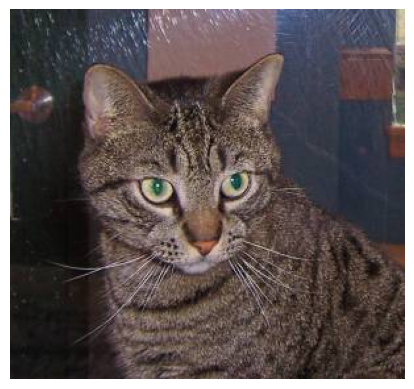

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat/1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


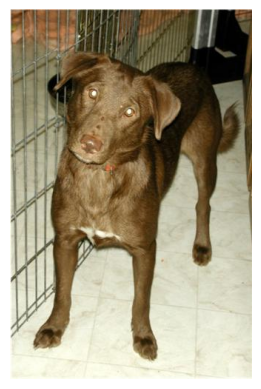

In [31]:
image=mpimg.imread('/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Dog/1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [61]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import shutil
import random

image_dir = '/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages'
test_dir = os.path.join(image_dir, "Test")

os.makedirs(os.path.join(test_dir, "Cat"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Dog"), exist_ok=True)

num_skipped = 0

for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(image_dir, folder_name)
    files = os.listdir(folder_path)
    random.shuffle(files)
    test_files = files[:10]
    for fname in test_files:
        fpath = os.path.join(folder_path, fname)
        if os.path.isfile(fpath):
            shutil.move(fpath, os.path.join(test_dir, folder_name, fname))
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            with Image.open(fpath) as img:
                img.verify()
        except (IOError, SyntaxError):
            num_skipped += 1
            os.remove(fpath)

print(f"Deleted {num_skipped} corrupted images")

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Training batches:", len(train_generator))
print("Validation batches:", len(validation_generator))
print("Testing batches:", len(test_generator))


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Deleted 0 corrupted images
Found 20000 images belonging to 3 classes.
Found 4998 images belonging to 3 classes.
Found 20 images belonging to 2 classes.
Training batches: 625
Validation batches: 157
Testing batches: 1


Shape of images batch: (32, 150, 150, 3)
Shape of labels batch: (32,)


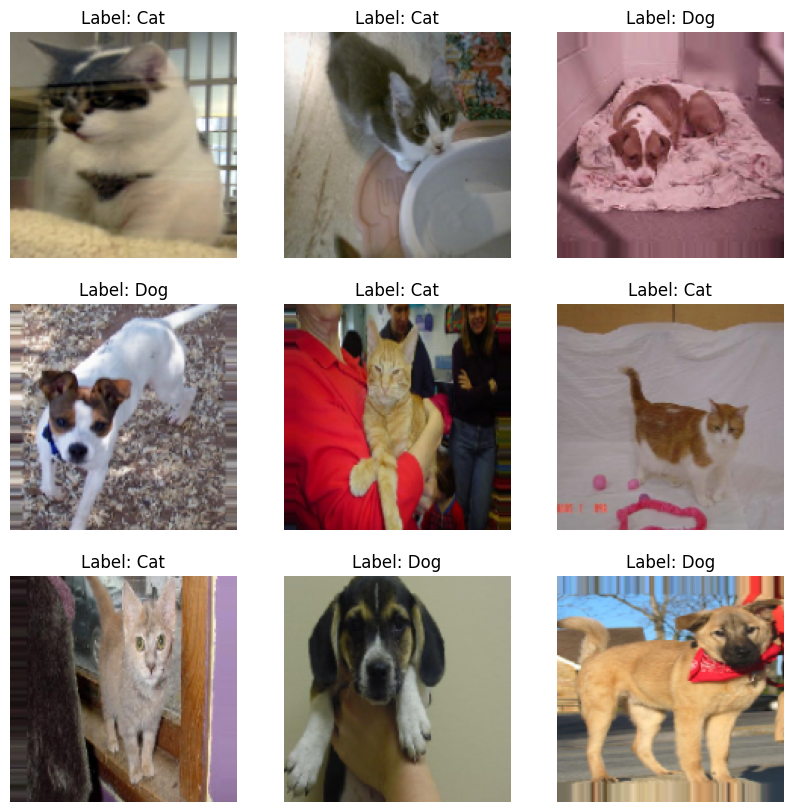

In [62]:
images, labels = next(train_generator)

print("Shape of images batch:", images.shape)
print("Shape of labels batch:", labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Label: {}".format("Dog" if labels[i] == 1 else "Cat"))
    plt.axis('off')
plt.show()


In [63]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

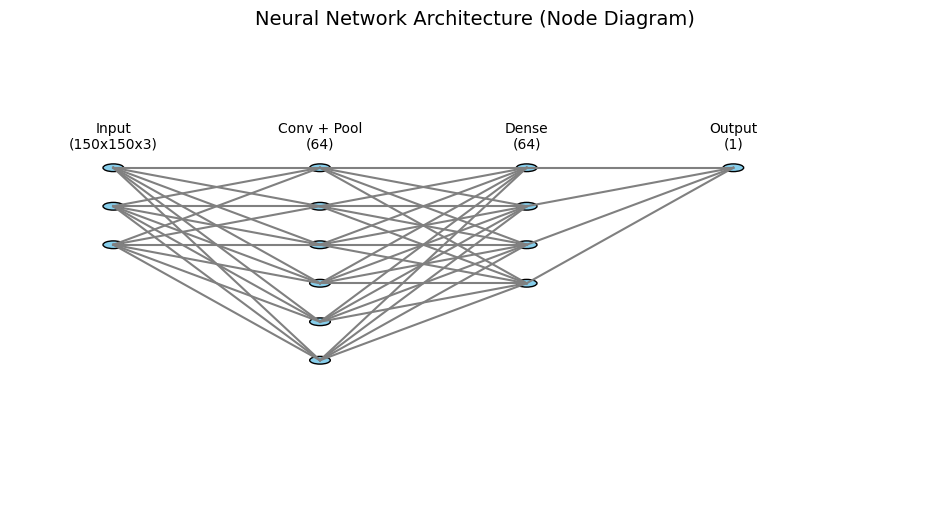

In [64]:
#AI generated

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

layer_sizes = [3, 6, 4, 1]
layer_labels = ["Input\n(150x150x3)", "Conv + Pool\n(64)", "Dense\n(64)", "Output\n(1)"]

v_spacing = 1.0
h_spacing = 2.0

max_layer_size = max(layer_sizes)

for i, (layer_size, label) in enumerate(zip(layer_sizes, layer_labels)):
    layer_top = v_spacing * (max_layer_size - 1) / 2.0
    for j in range(layer_size):
        circle = plt.Circle((i * h_spacing, layer_top - j * v_spacing),
                            radius=0.1, fill=True, color='skyblue', ec='black')
        ax.add_patch(circle)
    ax.text(i * h_spacing, layer_top + 0.5, label, ha='center', fontsize=10)

for i in range(len(layer_sizes) - 1):
    layer1_size = layer_sizes[i]
    layer2_size = layer_sizes[i + 1]
    layer1_top = v_spacing * (max_layer_size - 1) / 2.0
    layer2_top = v_spacing * (max_layer_size - 1) / 2.0
    for j in range(layer1_size):
        for k in range(layer2_size):
            line = plt.Line2D([i * h_spacing, (i + 1) * h_spacing],
                              [layer1_top - j * v_spacing, layer2_top - k * v_spacing],
                              c='gray')
            ax.add_line(line)

ax.set_xlim(-1, len(layer_sizes) * h_spacing)
ax.set_ylim(-max_layer_size, max_layer_size)
ax.axis('off')

plt.title('Neural Network Architecture (Node Diagram)', fontsize=14)
plt.show()


In [65]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=100,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4965 - loss: 3.3988

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.4966 - loss: 3.3796 - val_accuracy: 0.5004 - val_loss: 0.6931
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.4917 - loss: 0.6982 - val_accuracy: 0.4988 - val_loss: 0.6932
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.4852 - loss: 0.7250 - val_accuracy: 0.5398 - val_loss: 0.6913
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.4716 - loss: 0.6931 - val_accuracy: 0.4996 - val_loss: 0.6931
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6932


In [67]:
model.save("/content/cats_vs_dogs_model.keras")

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Test/Dog/10035.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


In [73]:
prediction = model.predict(img_array)
print("Raw output:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Raw output: [[0.49698418]]


In [74]:
if prediction[0][0] > 0.5:
    print("It's a DOG")
else:
    print("It's a CAT")


It's a CAT
